# Clustering and visualization via sklearn | Vladimir Bogdanov

## Data Visualization

In [1]:
from sklearn import datasets

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Using "digits" dataset

In [3]:
digits  =  datasets.load_digits()

In [4]:
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
print 'target:', digits.target[0]
print 'features: \n', digits.data[0] 
print 'number of features:', len(digits.data[0])

target: 0
features: 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
number of features: 64


## Sample objects vizualization

In [6]:
digits.data[0].shape

(64,)

In [7]:
print digits.data[0].reshape(8,8)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [8]:
digits.data[0].reshape(8,8).shape

(8, 8)

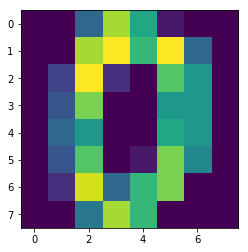

In [9]:
pylab.imshow(digits.data[0].reshape(8,8))

In [10]:
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


In [11]:
print digits.images[0]

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


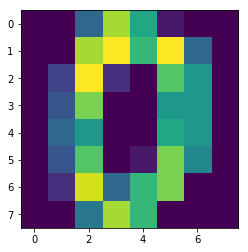

In [12]:
pylab.imshow(digits.images[0])

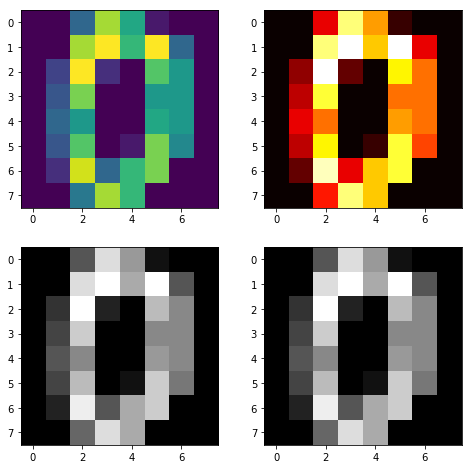

In [13]:
pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
pylab.imshow(digits.images[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(digits.images[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(digits.images[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')

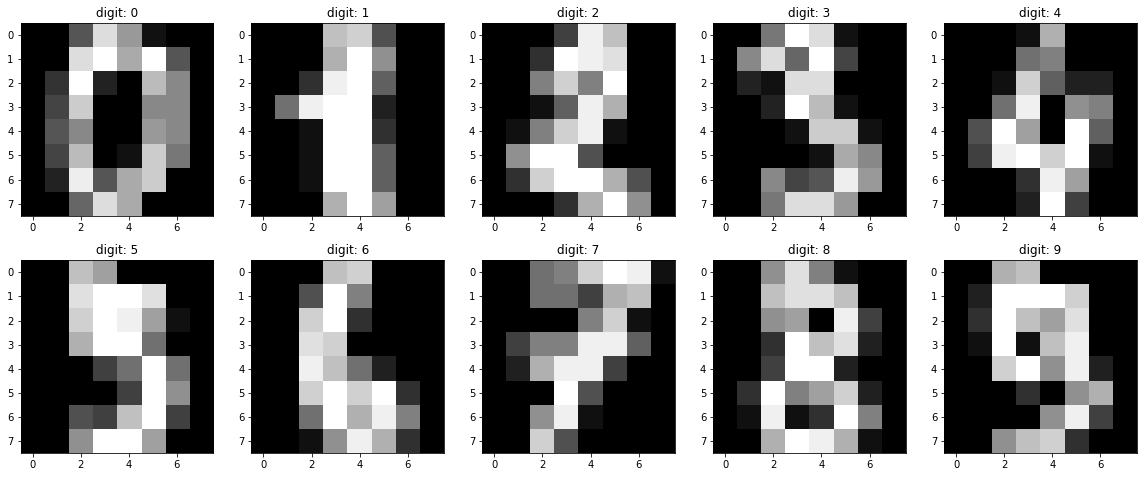

In [14]:
pyplot.figure(figsize(20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray')
    pylab.title('digit: ' + str(digits.target[plot_number]))

## Dimensionality reduction

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import  Counter

In [16]:
data = digits.data[:3000]
labels = digits.target[:3000]

In [17]:
print Counter(labels)

Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})


<Container object of 10 artists>

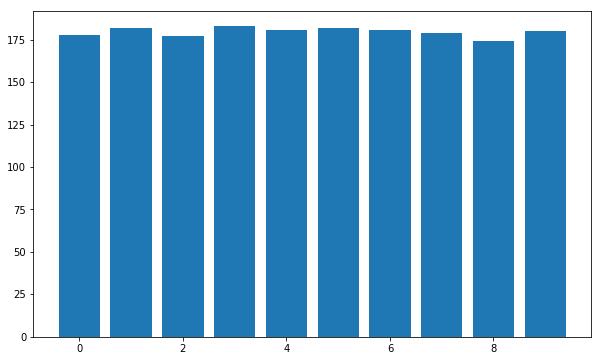

In [18]:
pylab.figure(figsize = (10, 6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

In [19]:
classifier = KNeighborsClassifier()

In [20]:
classifier.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
print classification_report(classifier.predict(data), labels)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       1.00      0.98      0.99       186
          2       1.00      1.00      1.00       177
          3       0.99      0.98      0.99       184
          4       1.00      0.99      1.00       182
          5       0.99      0.99      0.99       181
          6       1.00      0.99      0.99       183
          7       0.99      0.99      0.99       180
          8       0.98      0.99      0.98       172
          9       0.96      0.99      0.97       174

avg / total       0.99      0.99      0.99      1797



### Random projection

In [22]:
from sklearn import random_projection

In [23]:
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(data)

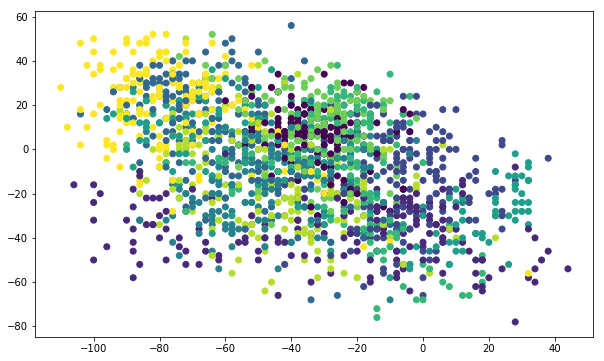

In [24]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)

In [25]:
classifier.fit(data_2d_rp, labels)
print classification_report(classifier.predict(data_2d_rp), labels)

             precision    recall  f1-score   support

          0       0.76      0.45      0.57       299
          1       0.77      0.55      0.64       256
          2       0.64      0.59      0.61       193
          3       0.59      0.48      0.53       224
          4       0.45      0.51      0.48       160
          5       0.35      0.60      0.44       107
          6       0.43      0.52      0.47       148
          7       0.45      0.55      0.50       147
          8       0.30      0.55      0.39        97
          9       0.62      0.67      0.65       166

avg / total       0.59      0.54      0.55      1797



### PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components = 2, random_state = 0, svd_solver='randomized')
data_2d_pca = pca.fit_transform(data)

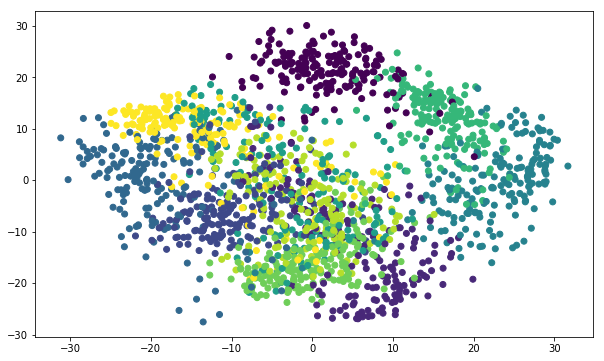

In [28]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

In [29]:
classifier.fit(data_2d_pca, labels)
print classification_report(classifier.predict(data_2d_pca), labels)

             precision    recall  f1-score   support

          0       0.91      0.92      0.92       176
          1       0.71      0.62      0.66       209
          2       0.80      0.70      0.75       200
          3       0.76      0.83      0.79       168
          4       0.88      0.87      0.88       184
          5       0.52      0.56      0.54       169
          6       0.82      0.86      0.84       174
          7       0.79      0.69      0.74       205
          8       0.46      0.50      0.48       159
          9       0.64      0.75      0.69       153

avg / total       0.74      0.73      0.73      1797



### MDS

In [30]:
from sklearn import manifold

In [31]:
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data)

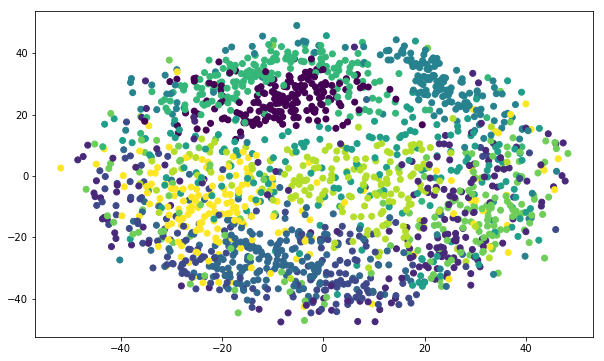

In [32]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)

In [33]:
classifier.fit(data_2d_mds, labels)
print classification_report(classifier.predict(data_2d_mds), labels)

             precision    recall  f1-score   support

          0       0.85      0.77      0.81       197
          1       0.58      0.45      0.51       231
          2       0.62      0.55      0.58       201
          3       0.69      0.66      0.67       192
          4       0.85      0.78      0.81       196
          5       0.41      0.50      0.45       149
          6       0.77      0.78      0.78       179
          7       0.42      0.54      0.48       140
          8       0.63      0.65      0.64       169
          9       0.49      0.62      0.55       143

avg / total       0.65      0.63      0.64      1797



### t- SNE

In [34]:
print np.isfinite(data).all() 
print np.isnan(data).all() 
print np.isinf(data).all() 

True
False
False


In [35]:
np.random.RandomState(42)
tsne = manifold.TSNE(n_components = 2, init = 'pca', method='exact')
data_2d_tsne = tsne.fit_transform(data)


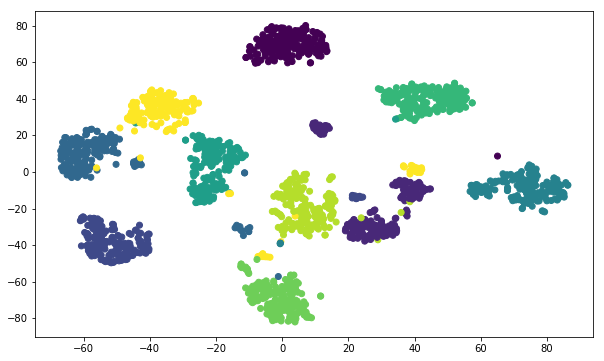

In [36]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

In [37]:
classifier.fit(data_2d_tsne, labels)
print classification_report(classifier.predict(data_2d_tsne), labels)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       177
          1       1.00      0.98      0.99       186
          2       1.00      1.00      1.00       177
          3       0.98      0.98      0.98       183
          4       1.00      0.99      0.99       183
          5       0.99      0.98      0.98       184
          6       1.00      0.99      1.00       182
          7       0.99      0.99      0.99       179
          8       0.98      0.99      0.98       172
          9       0.96      0.99      0.97       174

avg / total       0.99      0.99      0.99      1797

